# STAT 5650 Homework 2
### Seth Beckett

In [101]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import pingouin as pg
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
plt.style.use("ggplot")

## Problem 1

In [86]:
# bring in data, separate based on type
iris = pd.read_csv("../data/Iris.csv")

setosa = iris.loc[iris.Species == "setosa"].iloc[:, 0:4]
versicolor = iris.loc[iris.Species == "versicolor"].iloc[:, 0:4]
virginica = iris.loc[iris.Species == "virginica"].iloc[:, 0:4]

### 1a.

In [95]:
# function to plot flower distribution data
def make_dist_plots(species_data, species_name):
    fig, axs = plt.subplots(nrows=4, ncols=2, figsize=[10,15])
    fig.suptitle(f"{species_name} Variable Distributions", fontsize=18)

    sm.qqplot(species_data["PetalLength"], ax=axs[0, 0], line="s")
    axs[0, 0].set_title("Petal Length QQ-Plot")
    axs[0, 1].hist(species_data["PetalLength"], bins="sturges")
    axs[0, 1].set_title("Histogram of Petal Length")


    sm.qqplot(species_data["PetalWidth"], ax=axs[1, 0], line="s")
    axs[1, 0].set_title("Petal Width QQ-Plot")
    axs[1, 1].hist(species_data["PetalWidth"], bins="sturges")
    axs[1, 1].set_title("Histogram of Petal Width")

    sm.qqplot(species_data["SepalLength"], ax=axs[2, 0], line="s")
    axs[2, 0].set_title("Sepal Length QQ-Plot")
    axs[2, 1].hist(species_data["SepalLength"], bins="sturges")
    axs[2, 1].set_title("Histogram of Sepal Length")

    sm.qqplot(species_data["SepalWidth"], ax=axs[3, 0], line="s")
    axs[3, 0].set_title("Sepal Width QQ-Plot")
    axs[3, 1].hist(species_data["SepalWidth"], bins="sturges")
    axs[3, 1].set_title("Histogram of Sepal Width")

    plt.tight_layout()

In [90]:
# setosa variable numerical summaries
setosa.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,50.00000,50.000000,50.000000,50.000000
mean,5.00600,3.428000,1.462000,0.246000
std,0.35249,0.379064,0.173664,0.105386
min,4.30000,2.300000,1.000000,0.100000
25%,4.80000,3.200000,1.400000,0.200000
50%,5.00000,3.400000,1.500000,0.200000
75%,5.20000,3.675000,1.575000,0.300000
max,5.80000,4.400000,1.900000,0.600000


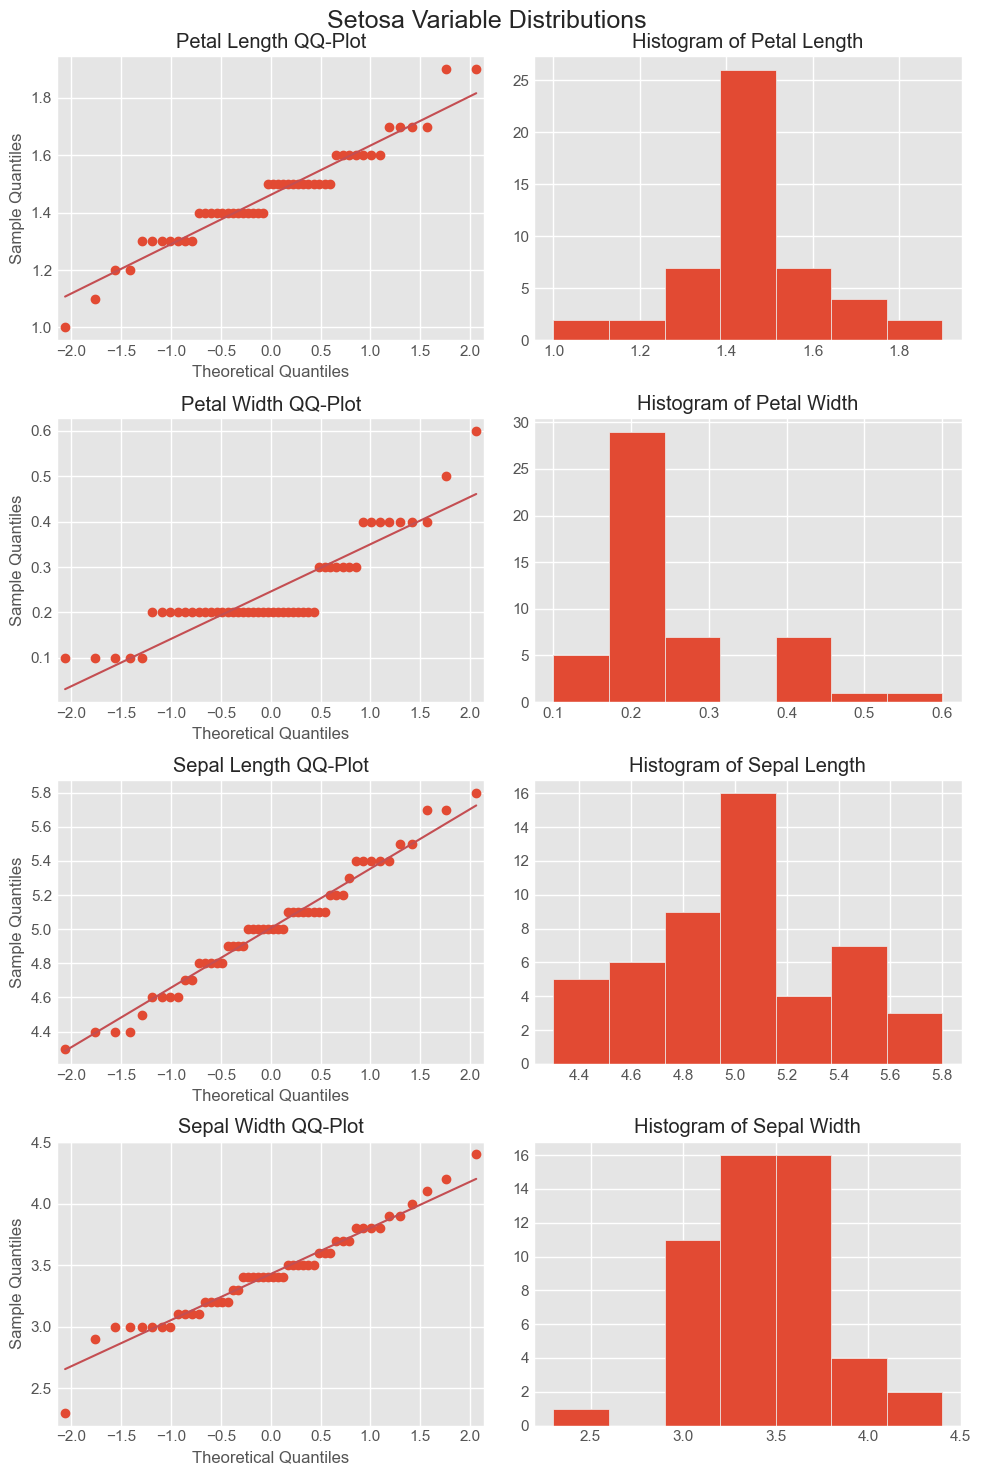

In [96]:
# setosa variable distributions
make_dist_plots(setosa, "Setosa")

In [91]:
# versicolor summary
versicolor.describe()


,SepalLength,SepalWidth,PetalLength,PetalWidth
count,50.000000,50.000000,50.000000,50.000000
mean,5.936000,2.770000,4.260000,1.326000
std,0.516171,0.313798,0.469911,0.197753
min,4.900000,2.000000,3.000000,1.000000
25%,5.600000,2.525000,4.000000,1.200000
50%,5.900000,2.800000,4.350000,1.300000
75%,6.300000,3.000000,4.600000,1.500000
max,7.000000,3.400000,5.100000,1.800000


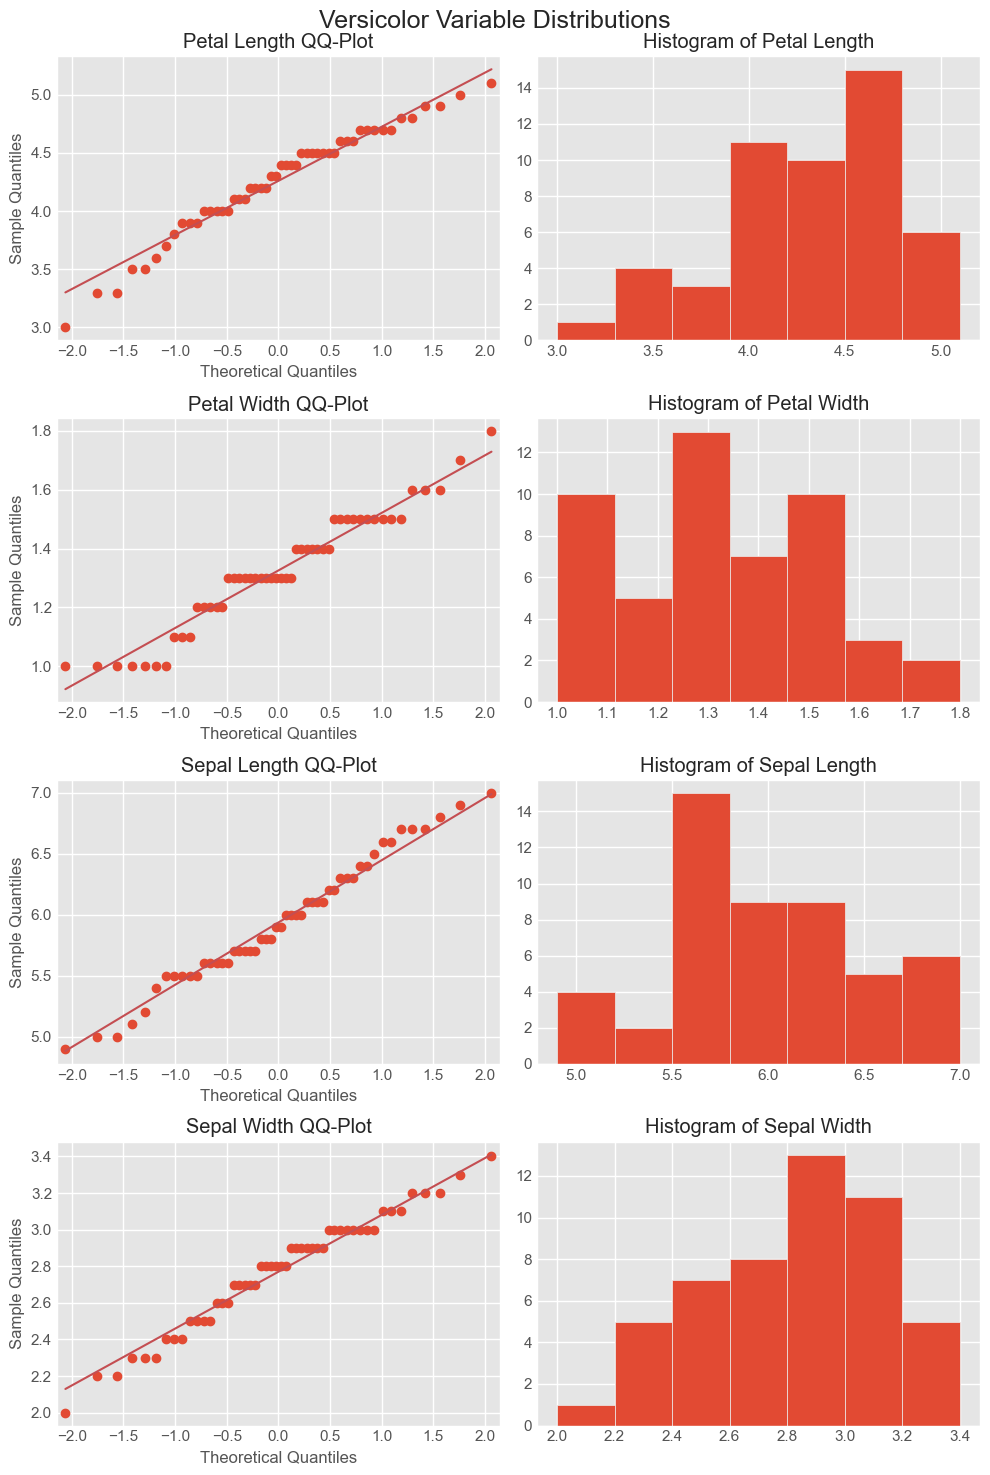

In [97]:
# versicolor distributions
make_dist_plots(versicolor, "Versicolor")

In [98]:
# virginica summary
virginica.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,50.00000,50.000000,50.000000,50.00000
mean,6.58800,2.974000,5.552000,2.02600
std,0.63588,0.322497,0.551895,0.27465
min,4.90000,2.200000,4.500000,1.40000
25%,6.22500,2.800000,5.100000,1.80000
50%,6.50000,3.000000,5.550000,2.00000
75%,6.90000,3.175000,5.875000,2.30000
max,7.90000,3.800000,6.900000,2.50000


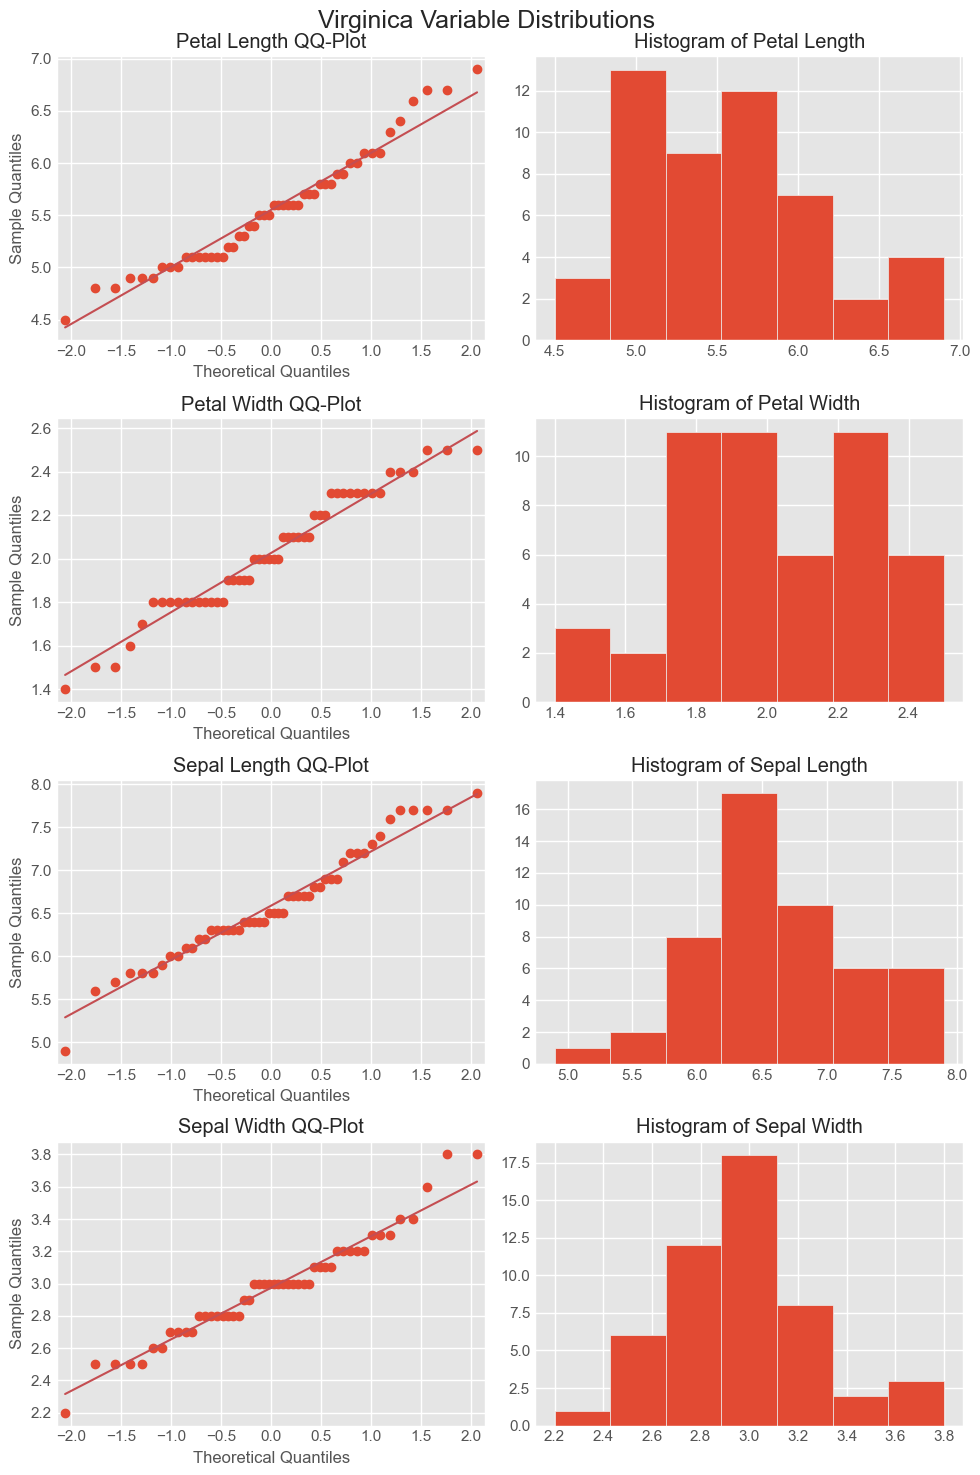

In [99]:
make_dist_plots(virginica, "Virginica")

In [100]:
# comparing species' covariance matrices
display(setosa.cov())
display(versicolor.cov())
display(virginica.cov())

,SepalLength,SepalWidth,PetalLength,PetalWidth
SepalLength,0.124249,0.099216,0.016355,0.010331
SepalWidth,0.099216,0.143690,0.011698,0.009298
PetalLength,0.016355,0.011698,0.030159,0.006069
PetalWidth,0.010331,0.009298,0.006069,0.011106


,SepalLength,SepalWidth,PetalLength,PetalWidth
SepalLength,0.266433,0.085184,0.182898,0.055780
SepalWidth,0.085184,0.098469,0.082653,0.041204
PetalLength,0.182898,0.082653,0.220816,0.073102
PetalWidth,0.055780,0.041204,0.073102,0.039106


,SepalLength,SepalWidth,PetalLength,PetalWidth
SepalLength,0.404343,0.093763,0.303290,0.049094
SepalWidth,0.093763,0.104004,0.071380,0.047629
PetalLength,0.303290,0.071380,0.304588,0.048824
PetalWidth,0.049094,0.047629,0.048824,0.075433


The data do appear to be approximately normally distributed, but definitely it's not perfectly so. Setosa petal width seems to be the least normally distributed of the variables among the three species.

The covariance matrices look like they are all unique. If we only care about accuracy to the first decimal place then they are a lot more similar, but still different.

### 1b.

In [102]:
pg.box_m(data=iris, dvs=["SepalLength", "SepalWidth", "PetalLength", "PetalWidth"], group="Species", alpha=0.05)

,Chi2,df,pval,equal_cov
box,140.94305,20.0,3.352034e-20,False


Using Box's M test we determine that the different species' covariance matrices are significantly different and can't be pooled.

### 1c.

In [103]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.model_selection import KFold, cross_validate
from sklearn.metrics import confusion_matrix

In [ ]:
# setosa modelling
lda = LinearDiscriminantAnalysis()
qda = QuadraticDiscriminantAnalysis()



## Problem 2

In [2]:
nests = pd.read_csv("../data/Nest.csv")

In [29]:
len(nests)

213

### 2a

In [105]:
X_nests = nests.drop(columns=["Nest", "Species", "StandType"])

In [106]:
X_nests.head()

,NumTreelt1in,NumTree1to3in,NumTree3to6in,NumTree6to9in,NumTree9to15in,NumTreegt15in,NumSnags,NumDownSnags,PctShrubCover,NumConifer
0,27,3,9,20,18,4,1,3,0.0,1
1,164,13,14,13,29,3,3,4,0.4,0
2,0,10,19,26,11,4,5,4,0.0,0
3,139,22,19,7,11,6,3,11,0.1,0
4,0,1,48,13,5,0,7,13,0.1,16


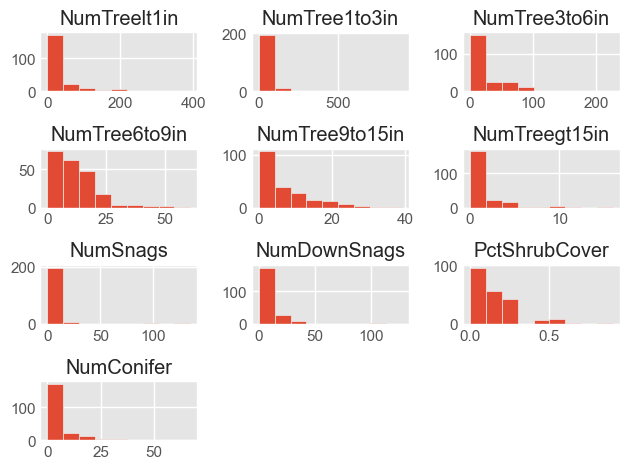

In [109]:
X_nests.hist(bins="sturges")
plt.tight_layout()

Above we can see that the original variables are definitely not normal in distribution. So, we will try a log transformation and see how that changes them.

In [125]:
log_X_nests = pd.DataFrame()

# transforming data and adding 1 to account for 0's
for col in X_nests.columns:
    log_X_nests[col] = np.log(X_nests[col] + 1)

In [126]:
log_X_nests.head()

,NumTreelt1in,NumTree1to3in,NumTree3to6in,NumTree6to9in,NumTree9to15in,NumTreegt15in,NumSnags,NumDownSnags,PctShrubCover,NumConifer
0,3.332205,1.386294,2.302585,3.044522,2.944439,1.609438,0.693147,1.386294,0.000000,0.693147
1,5.105945,2.639057,2.708050,2.639057,3.401197,1.386294,1.386294,1.609438,0.336472,0.000000
2,0.000000,2.397895,2.995732,3.295837,2.484907,1.609438,1.791759,1.609438,0.000000,0.000000
3,4.941642,3.135494,2.995732,2.079442,2.484907,1.945910,1.386294,2.484907,0.095310,0.000000
4,0.000000,0.693147,3.891820,2.639057,1.791759,0.000000,2.079442,2.639057,0.095310,2.833213


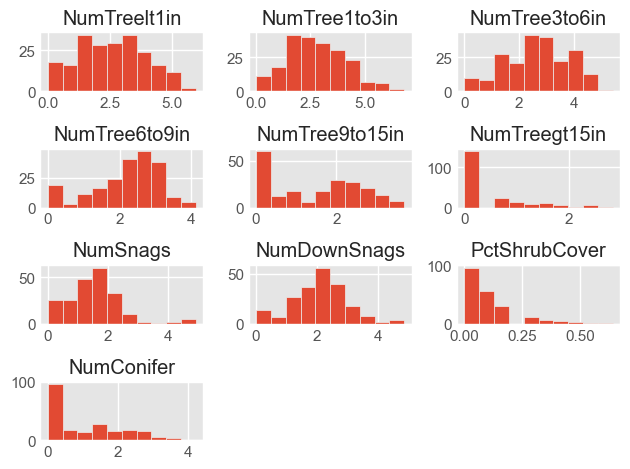

In [127]:
log_X_nests.hist()
plt.tight_layout()

Applying a log transformation greatly improved the normality of our data, but we can see that not everything is perfect still.

### 2b.